In [6]:
!kaggle competitions download -c forest-cover-type-prediction
!unzip forest-cover-type-prediction.zip
!rm forest-cover-type-prediction.zip
!rm sampleSubmission.csv.zip test.csv.zip train.csv.zip

100%|██████████████████████████████████████| 25.3M/25.3M [00:09<00:00, 2.91MB/s]
100%|██████████████████████████████████████| 25.3M/25.3M [00:09<00:00, 2.72MB/s]
Archive:  forest-cover-type-prediction.zip
  inflating: sampleSubmission.csv    
  inflating: sampleSubmission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: test3.csv               
  inflating: train.csv               
  inflating: train.csv.zip           


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('train.csv')
df=df.set_index(['Id'])
df_test=pd.read_csv('test.csv')
df_test=df_test.set_index(['Id'])
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,3
15117,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,3
15118,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,3


In [2]:
(df.dtypes!='object').sum()==len(df.columns)

True

In [3]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [4]:
df.isna().sum().sum()
df_test.isna().sum().sum()

0

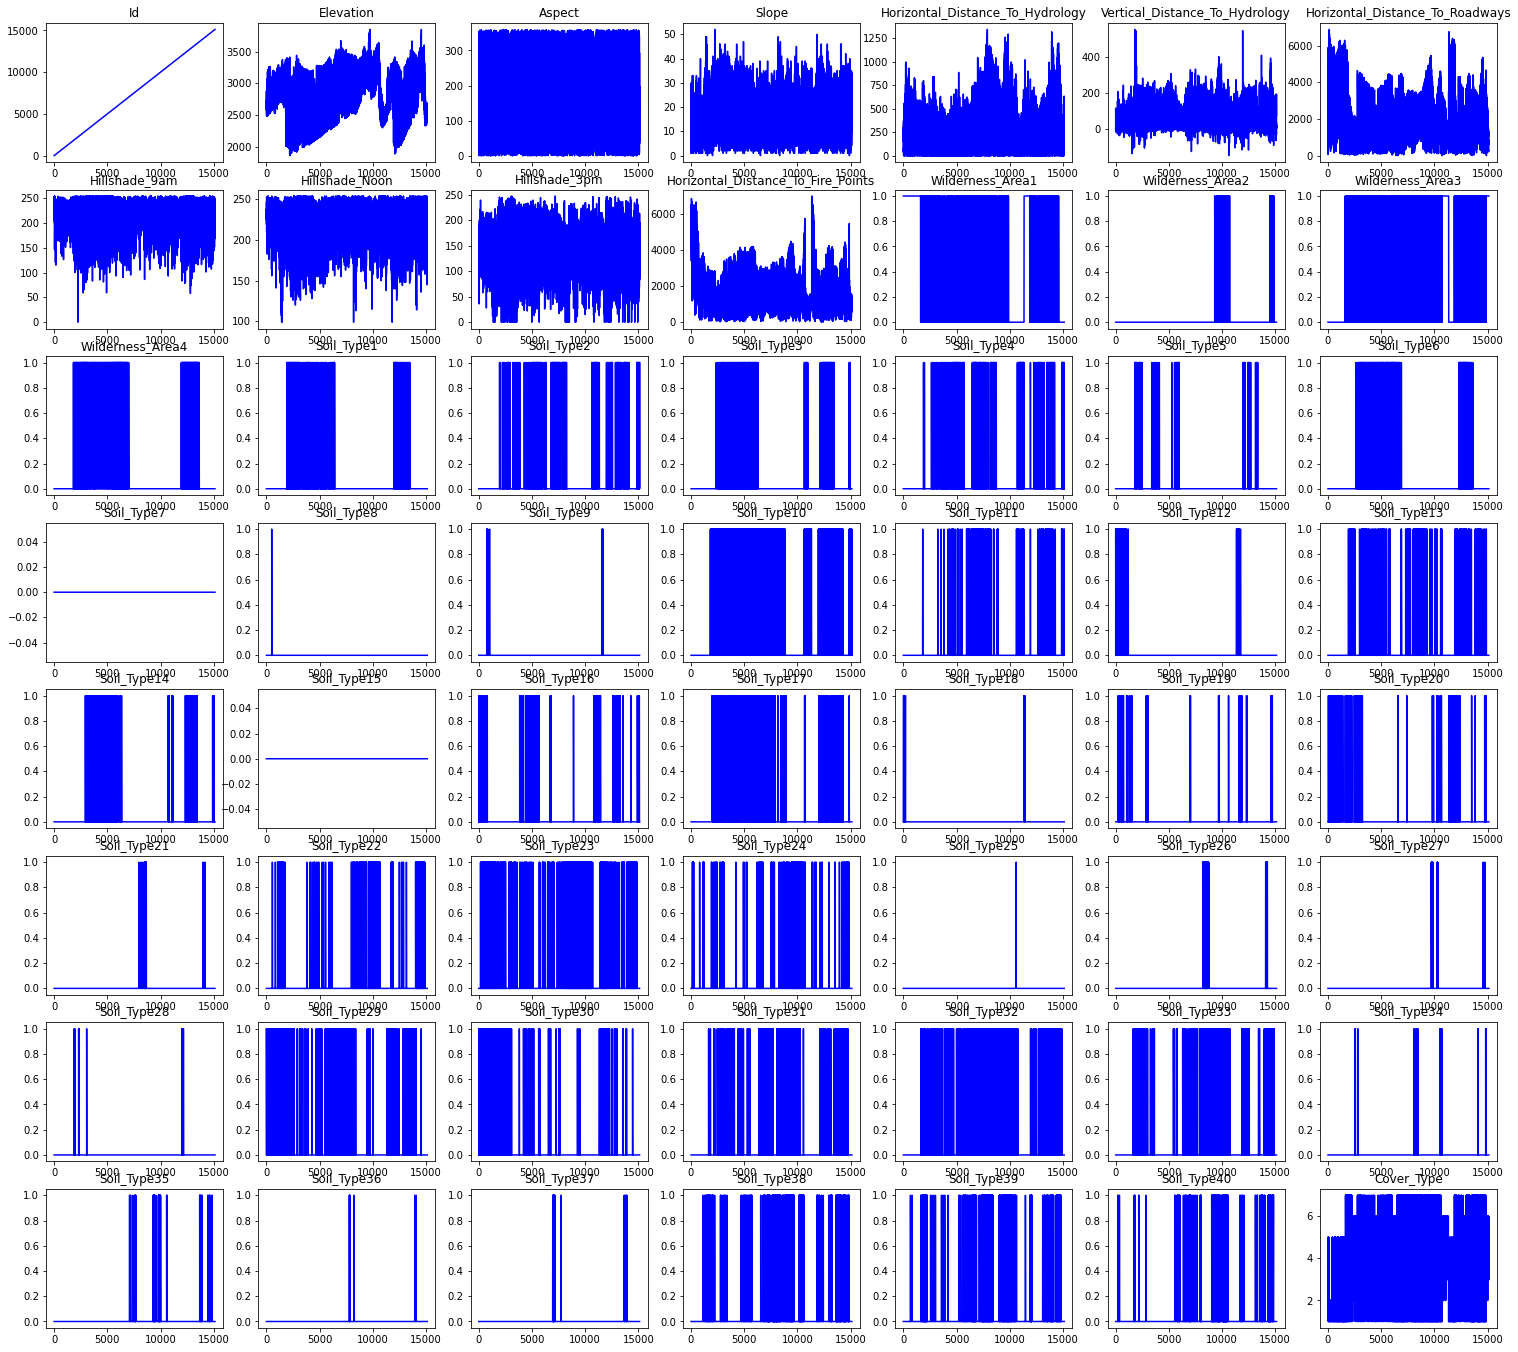

In [5]:
fig, ax1 = plt.subplots(figsize=(26, 24))

for i, col in enumerate(df.columns):
    plt.subplot(8, 7, i + 1)
    plt.plot(df[col], color='blue')
    plt.title(col)
    ax1.set_ylabel(col, color='b')

In [2]:
X=df.drop('Cover_Type', axis=1)
y=df.Cover_Type
y=y-1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)
submission = scaler.transform(df_test)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [24]:
classifiers = {
    "NB": GaussianNB(),
    "SGD": SGDClassifier(),
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
    "XGB": XGBClassifier(),
    "LGBM": LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    clf.fit(X_train,y_train)
    pred=clf.predict(X_val)


    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": accuracy_score(y_val,pred),
        "Avg_F1_Score": f1_score(y_val,pred,average='macro')
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
8,XGB,0.883267,0.881021,0.882144
9,LGBM,0.87963,0.876918,0.878274
10,CatBoost,0.870701,0.867968,0.869335
7,MLP,0.833664,0.831045,0.832355
4,DT,0.808201,0.80611,0.807156
2,KNN,0.772817,0.767411,0.770114
6,SVM,0.743386,0.739098,0.741242
3,LR,0.71164,0.706497,0.709068
1,SGD,0.653439,0.647487,0.650463
5,RF,0.632937,0.606966,0.619951


In [27]:
clf=XGBClassifier()
#clf.fit(X_train_scaled,y_train)

params = {
    "learning_rate": (0.1, 0.01, 0.001),
    "max_depth": (5,6,7),
    'n_estimators':(100,120,130),
    'base_score': (0.6,0.75,0.8)
}
clf = GridSearchCV(clf, params, cv=10)
clf.fit(X_train, y_train)
prediction_xgb=clf.predict(submission)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'base_score': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 130}


In [28]:
clf=CatBoostClassifier(silent=True)
params = {
    "learning_rate": (0.1,0.02, 0.01),
    "max_depth": (5,6,7),
    'n_estimators':(120,130),
}
clf = GridSearchCV(clf, params, cv=10)
clf.fit(X_train, y_train)
prediction_cat=clf.predict(submission)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 130}


In [29]:
clf=LGBMClassifier()

params = {
    "learning_rate": (0.1,0.3, 0.01),
    'num_leaves': (29,31,33),
    "max_depth": (-1,5,6,7),
    'n_estimators':(100,120,150),
}
clf = GridSearchCV(clf, params, cv=10)
clf.fit(X_train, y_train)

prediction_lgb=clf.predict(submission)
print("Best hyperparameter:", clf.best_params_)

Best hyperparameter: {'learning_rate': 0.3, 'max_depth': -1, 'n_estimators': 150, 'num_leaves': 33}


In [5]:
clf=XGBClassifier(base_score = 0.8, learning_rate = 0.1, max_depth = 7, n_estimators = 130)
clf.fit(X_train, y_train)
prediction_xgb=clf.predict(submission)

In [ ]:
clf=LGBMClassifier(num_leaves = 33, learning_rate = 0.3, max_depth = -1, n_estimators = 150)
clf.fit(X_train, y_train)
prediction_lgb=clf.predict(submission)

clf=CatBoostClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 130, silent=True)
clf.fit(X_train, y_train)
prediction_cat=clf.predict(submission)

array([[-0.1659767 ,  1.79250975, -0.29591811, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-0.15879389, -1.42327015, -0.41421025, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-0.08696589, -1.27792416, -0.17762597, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       ...,
       [-0.86989117,  0.02110557,  0.0589583 , ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-0.87467971,  0.12103093, -0.17762597, ..., -0.22490811,
        -0.21313437, -0.1769394 ],
       [-0.87707397,  0.07561031, -0.41421025, ..., -0.22490811,
        -0.21313437, -0.1769394 ]])

In [22]:
sample_submission=pd.read_csv('sampleSubmission.csv',index_col='Id')
sample_submission['Cover_Type'] = prediction_xgb+1
sample_submission.to_csv('submission.csv')

In [23]:
!kaggle competitions submit -c forest-cover-type-prediction -f submission.csv -m "Hello There!"

100%|███████████████████████████████████████| 4.78M/4.78M [00:10<00:00, 481kB/s]
Successfully submitted to Forest Cover Type Prediction